In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_37675_U')

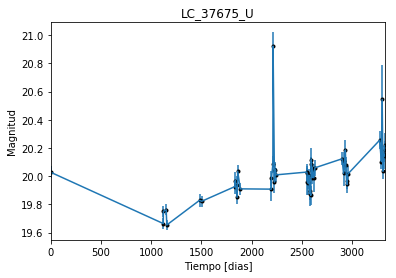

In [2]:
data = np.genfromtxt('LC_37675_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_37675_U')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

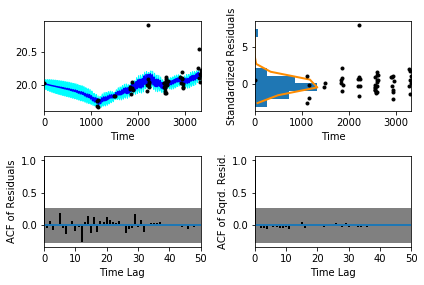

In [5]:
sample.assess_fit()

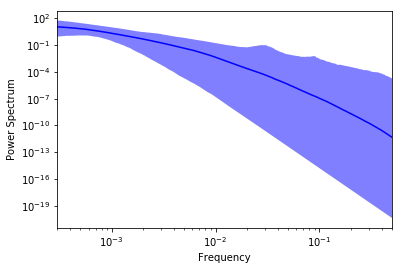

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_37675_U')

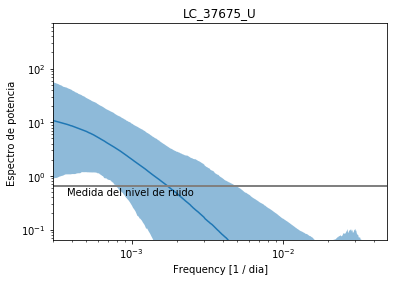

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_37675_U')

Text(0.5,1,'Prediccion , valor esperado LC_37675_U')

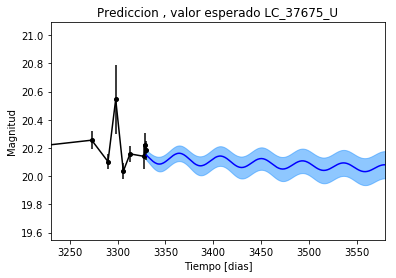

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_37675_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_37675_U')

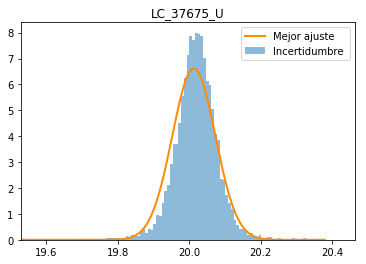

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_37675_U')

Text(0.5,1,'Interpolacion, camino simulado LC_37675_U')

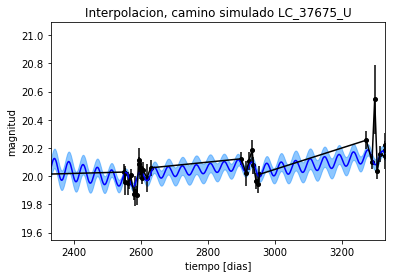

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_37675_U')

Text(0.5,1,'Interpolacion, camino simulado LC_37675_U')

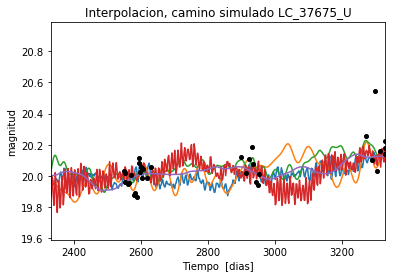

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_37675_U')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 504.210555131
Median: 0.00626836608418
Standard deviation: 0.191581099956
68% credibility interval: [ 0.00072528  0.1682918 ]
95% credibility interval: [  3.43583649e-04   7.39843408e-01]
99% credibility interval: [  3.13755017e-04   9.48610742e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 464.403670166
Median: 0.00166899222957
Standard deviation: 0.0756337894021
68% credibility interval: [ 0.00043068  0.02047177]
95% credibility interval: [ 0.00031906  0.22468357]
99% credibility interval: [  3.04930199e-04   5.94538186e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 311.626223475
Median: 0.0294325040869
Standard

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 748.558317841
Median: 47.9972537228
Standard deviation: 1.74622838825
68% credibility interval: [ 46.1098568   49.17943573]
95% credibility interval: [ 43.52152697  50.58192139]
99% credibility interval: [ 41.26112421  51.51828824]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 498.058238909
Median: 0.649247162104
Standard deviation: 2.17501196631
68% credibility interval: [ 0.05140161  3.71265501]
95% credibility interval: [ 0.01201159  7.70856603]
99% credibility interval: [  9.32976458e-03   1.04256642e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 261.761194704
Median: 0.288245632415
Standard deviation: 8.66355613501
68% credibility interval: [ 0.01316995  6.93122554]
95% credibility interval: [  2.1

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1434.92329922
Median: 1.77179782676e-16
Standard deviation: 3.4844806134e+110
68% credibility interval: [  1.41915083e-48   4.12227591e-03]
95% credibility interval: [  5.50161714e-99   2.53243958e+88]
99% credibility interval: [  9.80201442e-111   8.73661713e+105]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1441.3271433
Median: 19.9735430033
Standard deviation: 0.0834302581339
68% credibility interval: [ 19.9057056   20.04546214]
95% credibility interval: [ 19.81672634  20.14686957]
99% credibility interval: [ 19.72949203  20.2758328 ]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 161.738896265
Median: 0.0261424322076
Standard deviation: 0.226337595081
68% credibility interval: [ 0.          0.30202659]
95% credibility interval: [ 0.          0.85573035]
99% credibility interval: [ 0.          0.97743733]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 161.738896265
Median: 0.0261424322076
Standard deviation: 0.226337595081
68% credibility interval: [ 0.          0.30202659]
95% credibility interval: [ 0.          0.85573035]
99% credibility interval: [ 0.          0.97743733]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1214.95424874
Median: 0.0
Standard deviation: 0.000527423082021
68% cr

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 748.558317841
Median: 47.9972537228
Standard deviation: 1.74622838825
68% credibility interval: [ 46.1098568   49.17943573]
95% credibility interval: [ 43.52152697  50.58192139]
99% credibility interval: [ 41.26112421  51.51828824]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1693.96635734
Median: 0.0224374606578
Standard deviation: 0.0243255711046
68% credibility interval: [ 0.01334101  0.04299498]
95% credibility interval: [ 0.00821241  0.0837312 ]
99% credibility interval: [ 0.00638351  0.15018478]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 608.979586786
Median: 1.81337663913
Standard deviation: 0.170738689722
68% credibility interval: [ 1.61617155  1.94365042]
95% credibility interval: [ 1.35383539  1.99083171]
99% credibility interval: [ 1.20020375  1.99845915]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1068.73224568
Median: 0.000106653040178
Standard deviation: 0.19427261718
68% credibility interval: [  2.46665328e-07   5.84611689e-03]
95% credibility interval: [  3.42916980e-91   2.67708672e-01]
99% credibility interval: [  1.77720318e-109   8.78928940e-001]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 504.210555131
Median: (-0.0393853056801+0j)
Standard deviation: 1.86317395757
68% credibility interval: [-1.05740859-4.04911167j -0.00455709-0.00498732j]
95% credibility interval: [ -4.64857323e+00 -4.10494861e+00j  -2.15879974e-03 -1.18816996e-03j]
99% credibility interval: [ -5.96029708e+00+0.j          -1.97138091e-03-0.00137948j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 464.403670166
Median: (-0.0104865874546+1.647265505j)
Standard deviation: 1.49942101948
68% credibility interval: [-0.12862793+0.j -0.00270603+0.j]
95% credibility interval: [-1.41172852+0.63540994j -0.00200470+0.j        ]
99% credibility interval: [ -3.73559359e+00+4.54130438j  -1.91593295e-03+0.19334065j]
Posterior summary for parameter ar